# AI By Amarah

In [1]:
# deep neural network to perform image classification

In [2]:
# image dataset called - Cipha or Sipher 10 dataset

# STEP 0: PROBLEM STATEMENT

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html


# STEP #1: IMPORT LIBRARIES/DATASETS

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

In [4]:
#!pip install numpy --upgrade 

In [5]:
from keras.datasets import cifar10 
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [6]:
X_train.shape #width 32, height 32, channels = 3 

(50000, 32, 32, 3)

In [7]:
X_test.shape #10k samples 

(10000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_test.shape

(10000, 1)

# STEP #2: VISUALIZE DATA

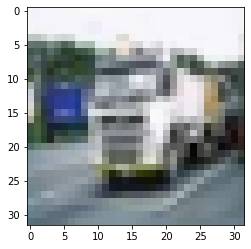

In [10]:
i=1000 #random index
plt.imshow(X_train[i]) # go to my x_train i.e my training data , pick up the image with index i and show it.

[9]


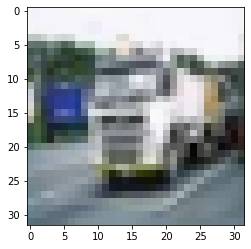

In [11]:
i=1000 #random index
plt.imshow(X_train[i])
print(y_train[i]) #gave output as class 9

[1]


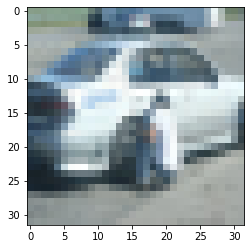

In [12]:
i = 30009
plt.imshow(X_train[i])
print(y_train[i]) #class 1

In [13]:
# i will create a grid and then am gng to find this grid as w of the grid lets take 15

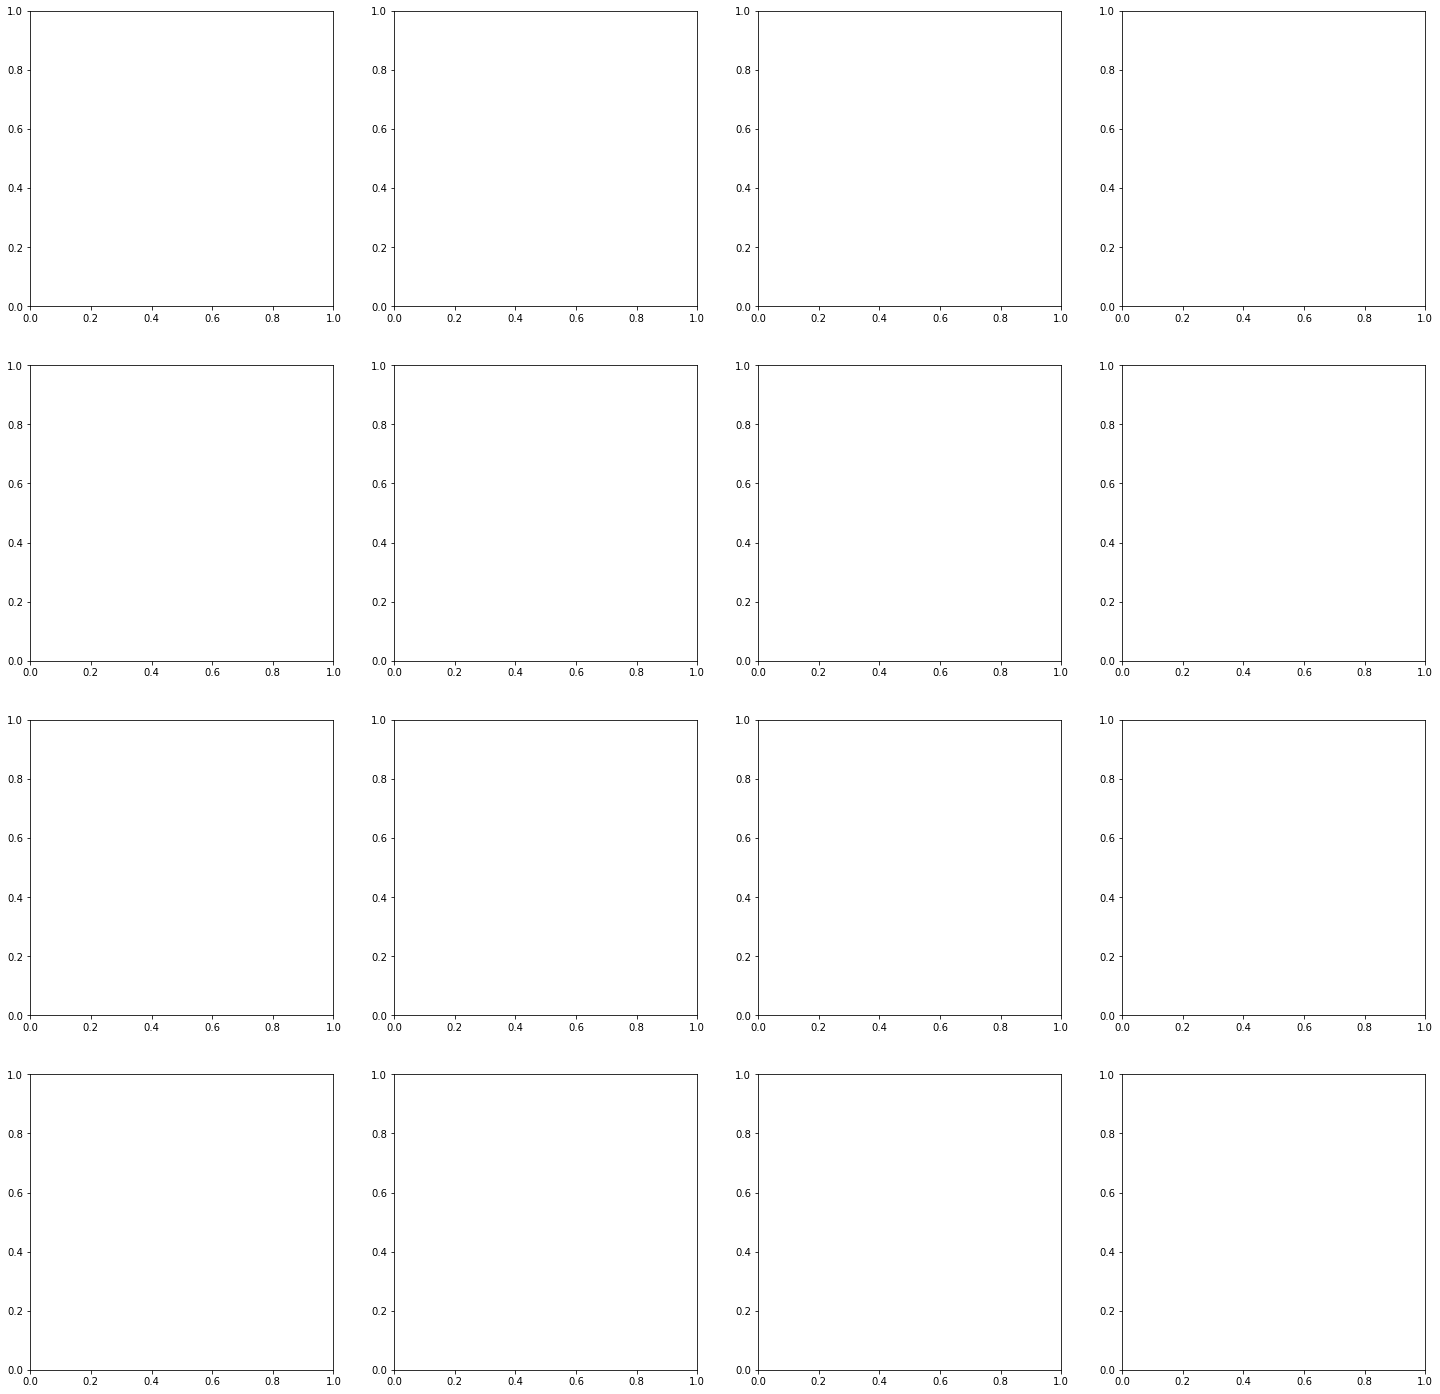

In [14]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel() #ravel is used to flatten the matrix

n_training = len(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


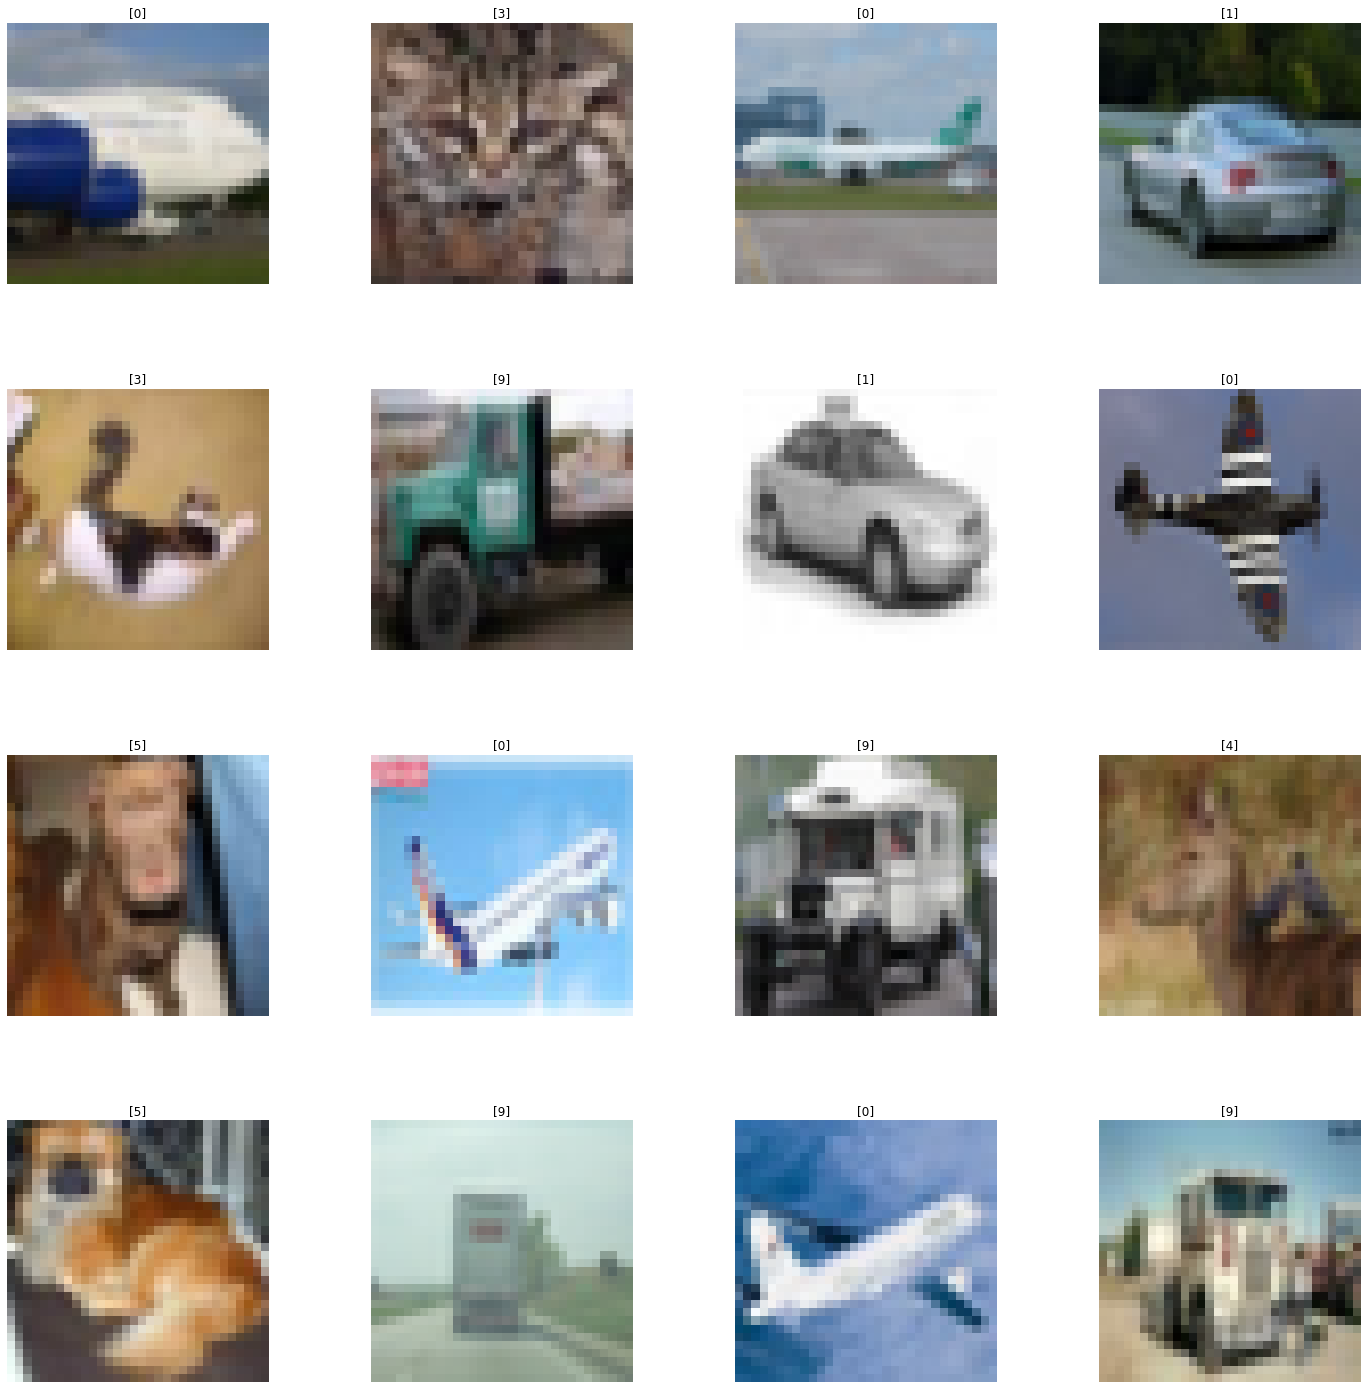

In [15]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel() #ravel is used to flatten the matrix

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [16]:
n_training

50000

In [17]:
n_training

50000

# STEP #3: DATA PREPARATION

In [18]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [19]:
number_cat = 10

In [20]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [21]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [22]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [24]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [25]:
X_train = X_train/255
X_test = X_test/255


In [26]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [27]:
X_train.shape

(50000, 32, 32, 3)

In [28]:
Input_shape = X_train.shape[1:]

In [29]:
Input_shape

(32, 32, 3)

# STEP #4: TRAIN THE MODEL

In [30]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [31]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))


cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [32]:
from tensorflow.keras import optimizers

In [33]:
optimizers.RMSprop(lr = 0.001)

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [36]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(lr = 0.001), metrics = ['accuracy'])

In [37]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 1, shuffle = True)

1563/1563 [==============================] - 212s 135ms/step - loss: 1.6194 - accuracy: 0.4216


# STEP #5: EVALUATE THE MODEL

In [38]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 9s 29ms/step - loss: 1.3746 - accuracy: 0.5332
Test Accuracy: 0.5332000255584717


In [39]:
#!pip install Tensorflow==2.6.0

In [40]:
predicted_classes = cnn_model.predict(X_test) 
predicted_classes

313/313 [==============================] - 9s 27ms/step


array([[2.4194496e-04, 6.3740576e-05, 1.2642800e-02, ..., 1.4645254e-03,
        6.9090468e-04, 1.0978652e-04],
       [4.3065991e-02, 9.8703519e-02, 7.6391257e-04, ..., 2.7247313e-06,
        8.5235691e-01, 4.9089198e-03],
       [1.2810050e-01, 1.4376426e-01, 2.3421688e-02, ..., 1.8739024e-03,
        6.3891113e-01, 4.0269297e-02],
       ...,
       [2.6293962e-06, 3.0398857e-07, 4.5173433e-02, ..., 2.1583458e-02,
        5.5424408e-08, 2.3039906e-06],
       [6.7924492e-02, 1.4993988e-02, 2.0437907e-01, ..., 2.2650613e-01,
        7.5435252e-03, 2.5642395e-03],
       [4.8032111e-06, 8.6174133e-08, 2.9815544e-04, ..., 9.1687953e-01,
        1.6300495e-08, 3.6489308e-07]], dtype=float32)

In [41]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [42]:
y_test = y_test.argmax(1)

In [43]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

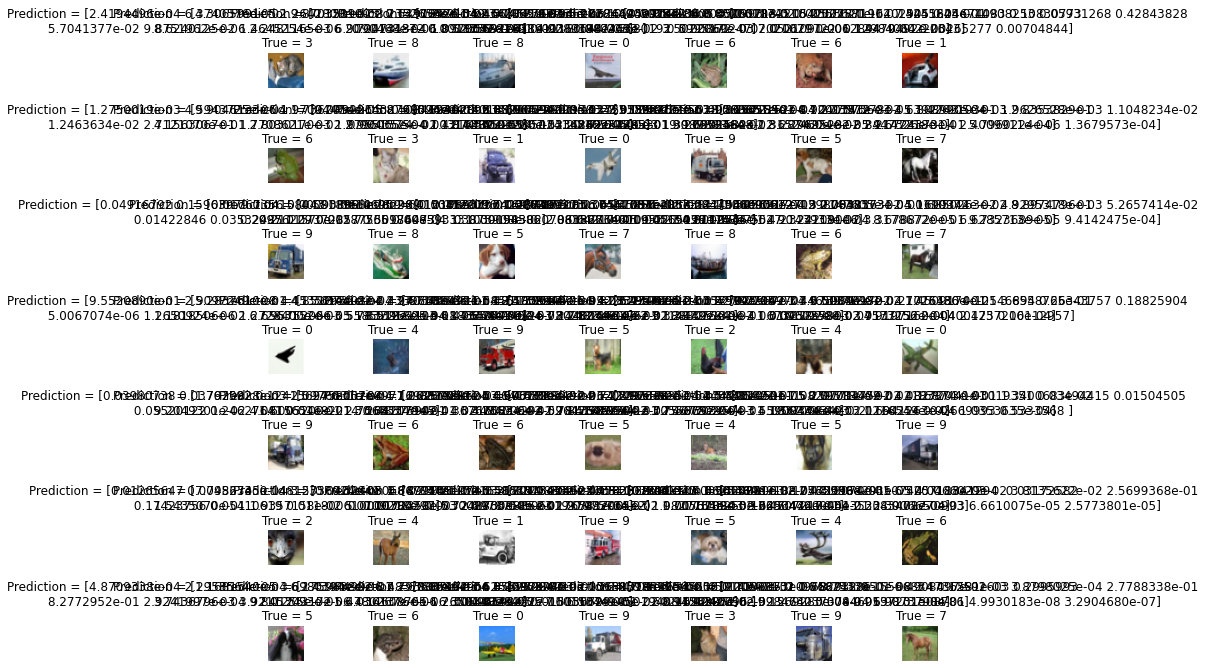

In [44]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 2)    

In [45]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns

# cm = confusion_matrix(y_test, predicted_classes)
# cm
# plt.figure(figsize = (10, 10))
# sns.heatmap(cm, annot = True)

# STEP #6: SAVING THE MODEL

In [46]:
import os 
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

# STEP #7: IMPROVING THE MODEL WITH DATA AUGMENTATION

- Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images. 
- Augmentations also include shifting and changing the brightness of the images.

# STEP 7.1 DATA AUGMENTATION FOR THE CIFAR-10 DATASET

In [47]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [48]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [49]:
X_train.shape

(50000, 32, 32, 3)

In [50]:
n = 8 
X_train_sample = X_train[:n]

In [51]:
X_train_sample.shape

(8, 32, 32, 3)

In [52]:
from keras.preprocessing.image import ImageDataGenerator

# dataget_train = ImageDataGenerator(rotation_range = 90)
# dataget_train = ImageDataGenerator(vertical_flip=True)
# dataget_train = ImageDataGenerator(height_shift_range=0.5)
dataget_train = ImageDataGenerator(brightness_range=(1,3))


dataget_train.fit(X_train_sample)

In [53]:
#!pip uninstall scipy

In [54]:
#!pip install scipi==1.2.0

In [55]:
#!pip install numpy scipy

In [56]:
#!pip install Pillow

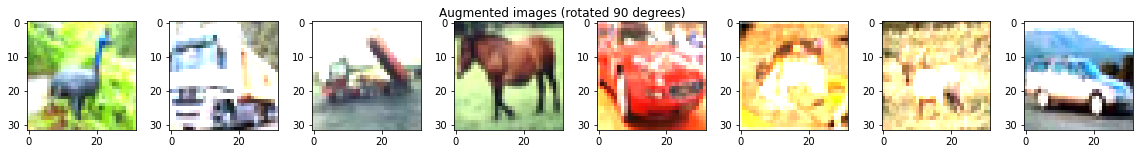

In [57]:
from PIL import Image
fig = plt.figure(figsize = (20,2))
for x_batch in dataget_train.flow(X_train_sample, batch_size = n):
     for i in range(0,n):
            ax = fig.add_subplot(1, n, i+1)
            ax.imshow(Image.fromarray(np.uint8(x_batch[i])))
     fig.suptitle('Augmented images (rotated 90 degrees)')
     plt.show()
     break;



In [58]:
# from scipy.misc import toimage
# #from scipy.misc.pilutil import toimage

# fig = plt.figure(figsize = (20,2))
# for x_batch in dataget_train.flow(X_train_sample, batch_size = n):
#      for i in range(0,n):
#             ax = fig.add_subplot(1, n, i+1)
#             ax.imshow(toimage(x_batch[i]))
#      fig.suptitle('Augmented images (rotated 90 degrees)')
#      plt.show()
#      break;


# STEP 7.2 MODEL TRAINING USING AUGEMENTED DATASET

In [71]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

In [72]:
datagen.fit(X_train)

In [73]:
#cnn_model.fit(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2)

In [74]:
cnn_model

In [81]:
#score = cnn_model.evaluate(X_test, y_test)
#print('Test accuracy', score[1]) 

In [80]:
#print('Test Accuracy: {}'.format(score[1]))

In [77]:
# save the model
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)